In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas
from bmm import BMM
from lda import LDA
from labellines import labelLine, labelLines

In [2]:
data = sio.loadmat('kos_doc_data.mat')
A = data['A']
B = data['B']
V = []
for arr in data['V']:
    V.append(arr[0][0])
V = np.array(V)

In [3]:
A, B, V

(array([[   1,    2,    1],
        [   1,   15,    1],
        [   1,   28,    1],
        ...,
        [2000, 6689,    1],
        [2000, 6761,    1],
        [2000, 6798,    2]], dtype=uint16),
 array([[2001,   69,    3],
        [2001,   75,    1],
        [2001,   76,    1],
        ...,
        [3430, 6738,    1],
        [3430, 6760,    1],
        [3430, 6767,    1]], dtype=uint16),
 array(['aarp', 'abandon', 'abandoned', ..., 'zogbys', 'zone', 'zones'],
       dtype='<U40'))

In [4]:
A.shape, B.shape, V.shape

((205211, 3), (147949, 3), (6906,))

# Task A -  Maximum Likelihood

In [5]:
def sorted_word(mlm, word_ids,M):
    W = len(mlm)
    xx = np.linspace(0, M, M)
    plt.figure(figsize=(20, 20))
    sorted_indices = np.argsort(mlm,0)
    sorted_names = word_ids[sorted_indices]
    plt.barh(xx, mlm[sorted_indices[-M:]])
    plt.yticks(np.linspace(0, M, M), labels=sorted_names[-M:])
    plt.ylim([-2, M+2])
    plt.xlabel('Probability')
    plt.ylabel('Words')
    plt.title('Alpha = 1000000')
    plt.show()
    #plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    #plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    #plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
    #plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
    #plt.rc('legend', fontsize='xx-large')
    
    #plt.figure(figsize=(20, 20))
    #plt.plot(mlm[sorted_indices[::-1]],'x')
    #plt.ylabel('Word Probability')
    #plt.xlabel('Order')
    #plt.show()
    #plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    #plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels

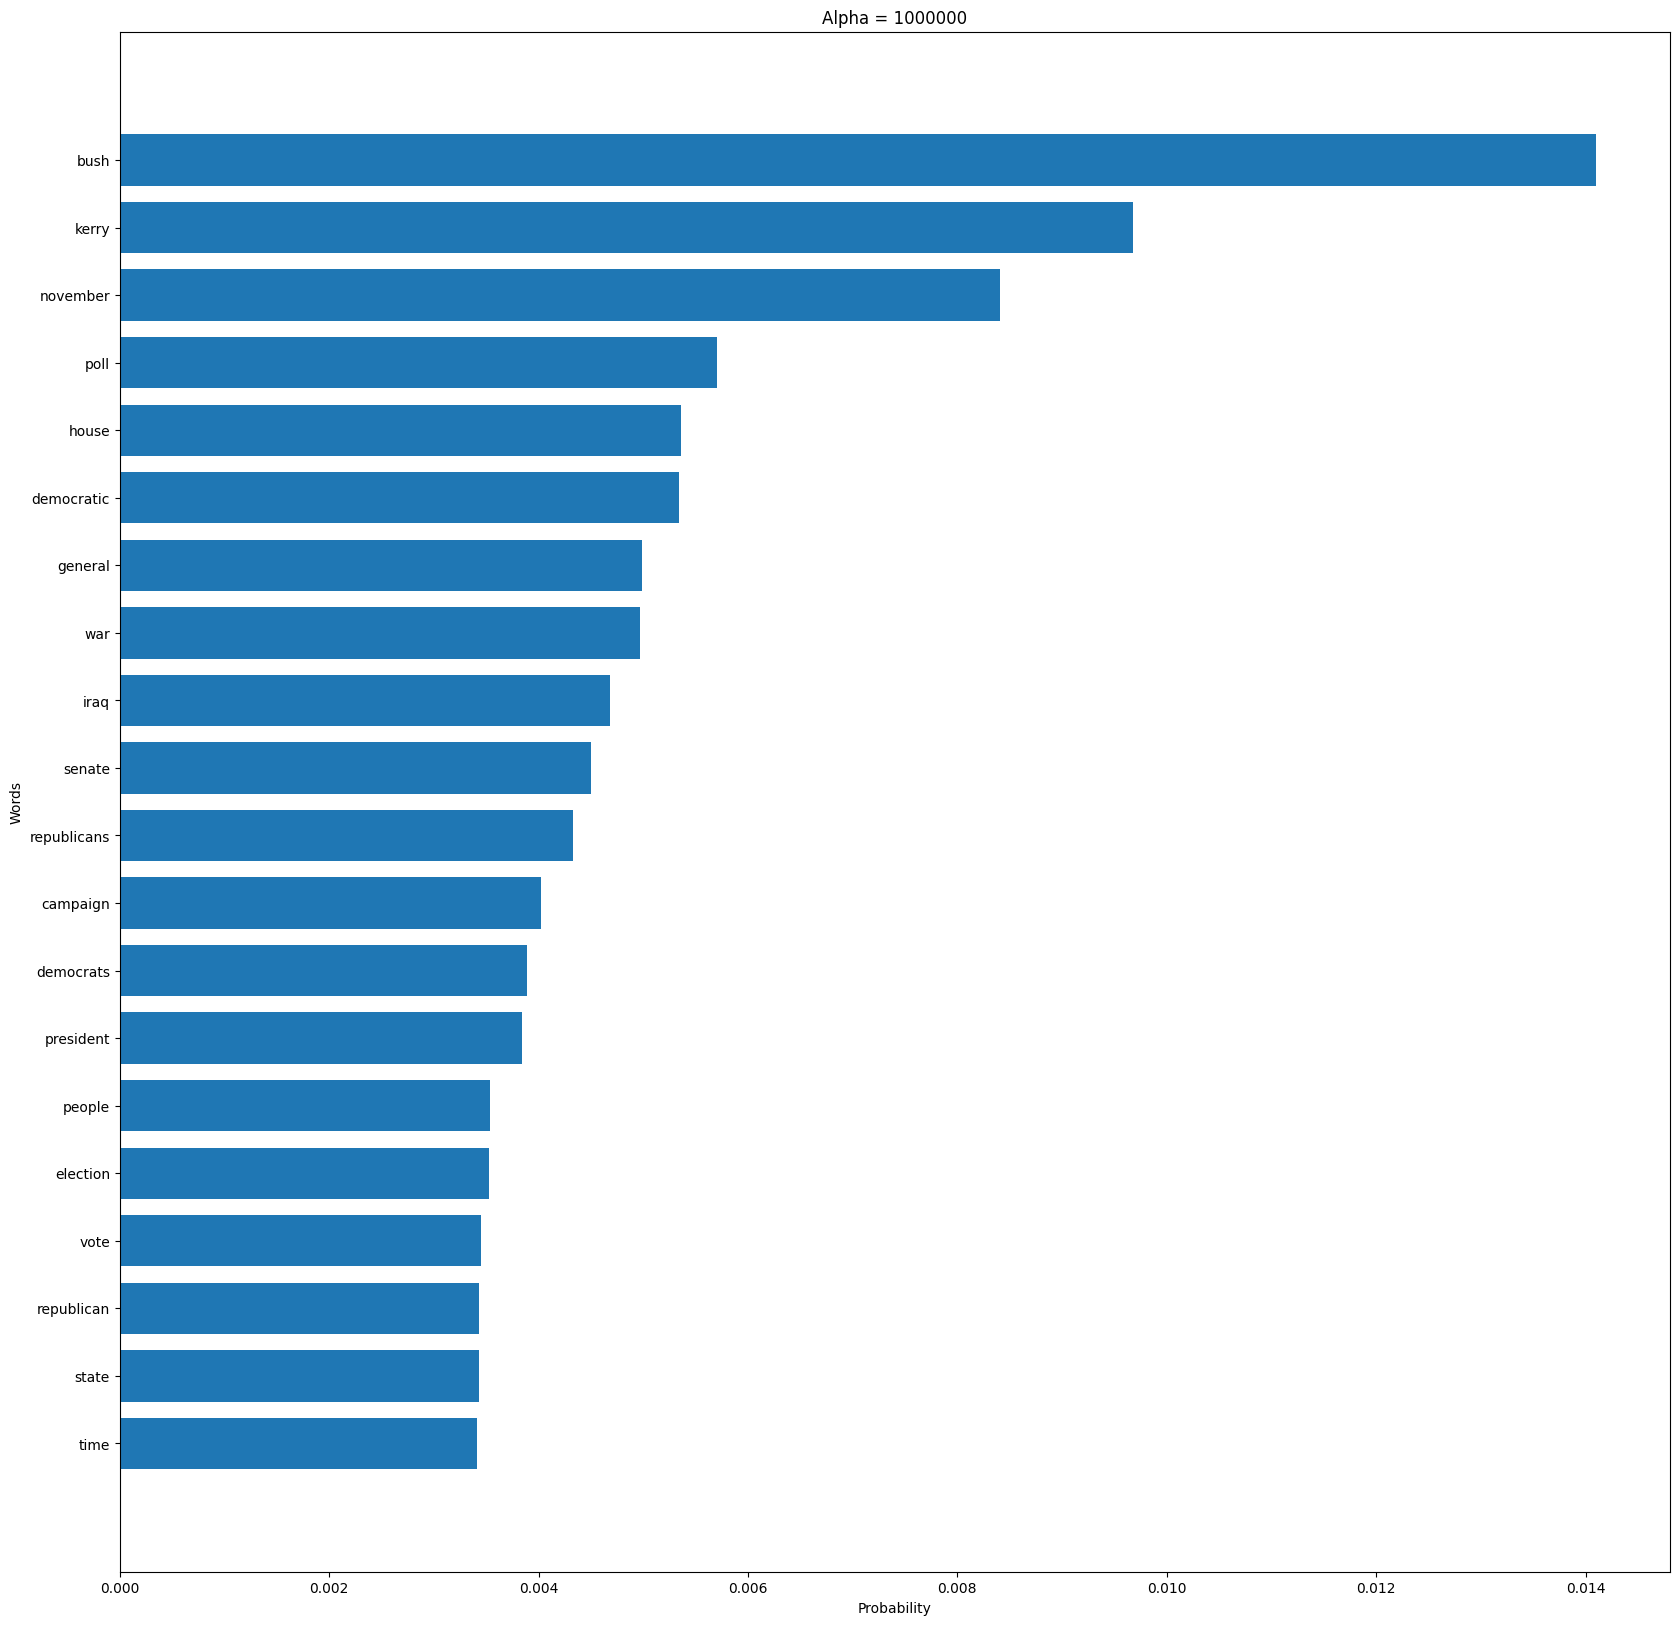

In [6]:
N_1 = A.shape[0] #number training examples
N_2 = B.shape[0] #number test examples
start = np.min([np.min(A[:, 1]), np.min(B[:, 1])])
D = np.max(A[:, 0]) # number of documents
N_w = np.sum(A,0)[2] # total number of words (not unique) in A
W = np.max([np.max(A[:, 1]), np.max(B[:, 1])]) # number of unique words
mlm = np.zeros(W)
counts=np.zeros(W)
for i in range(N_1):
    counts[A[i,1]-1]+=A[i,2]
mlm = counts/N_w
word_ids = np.linspace(start,W,W,dtype = int)

M=20
sorted_word(mlm,V,M)

# Task B - Bayesian Inference

In [7]:
sorted_indices = np.argsort(mlm,0)
sorted_names = V[sorted_indices]

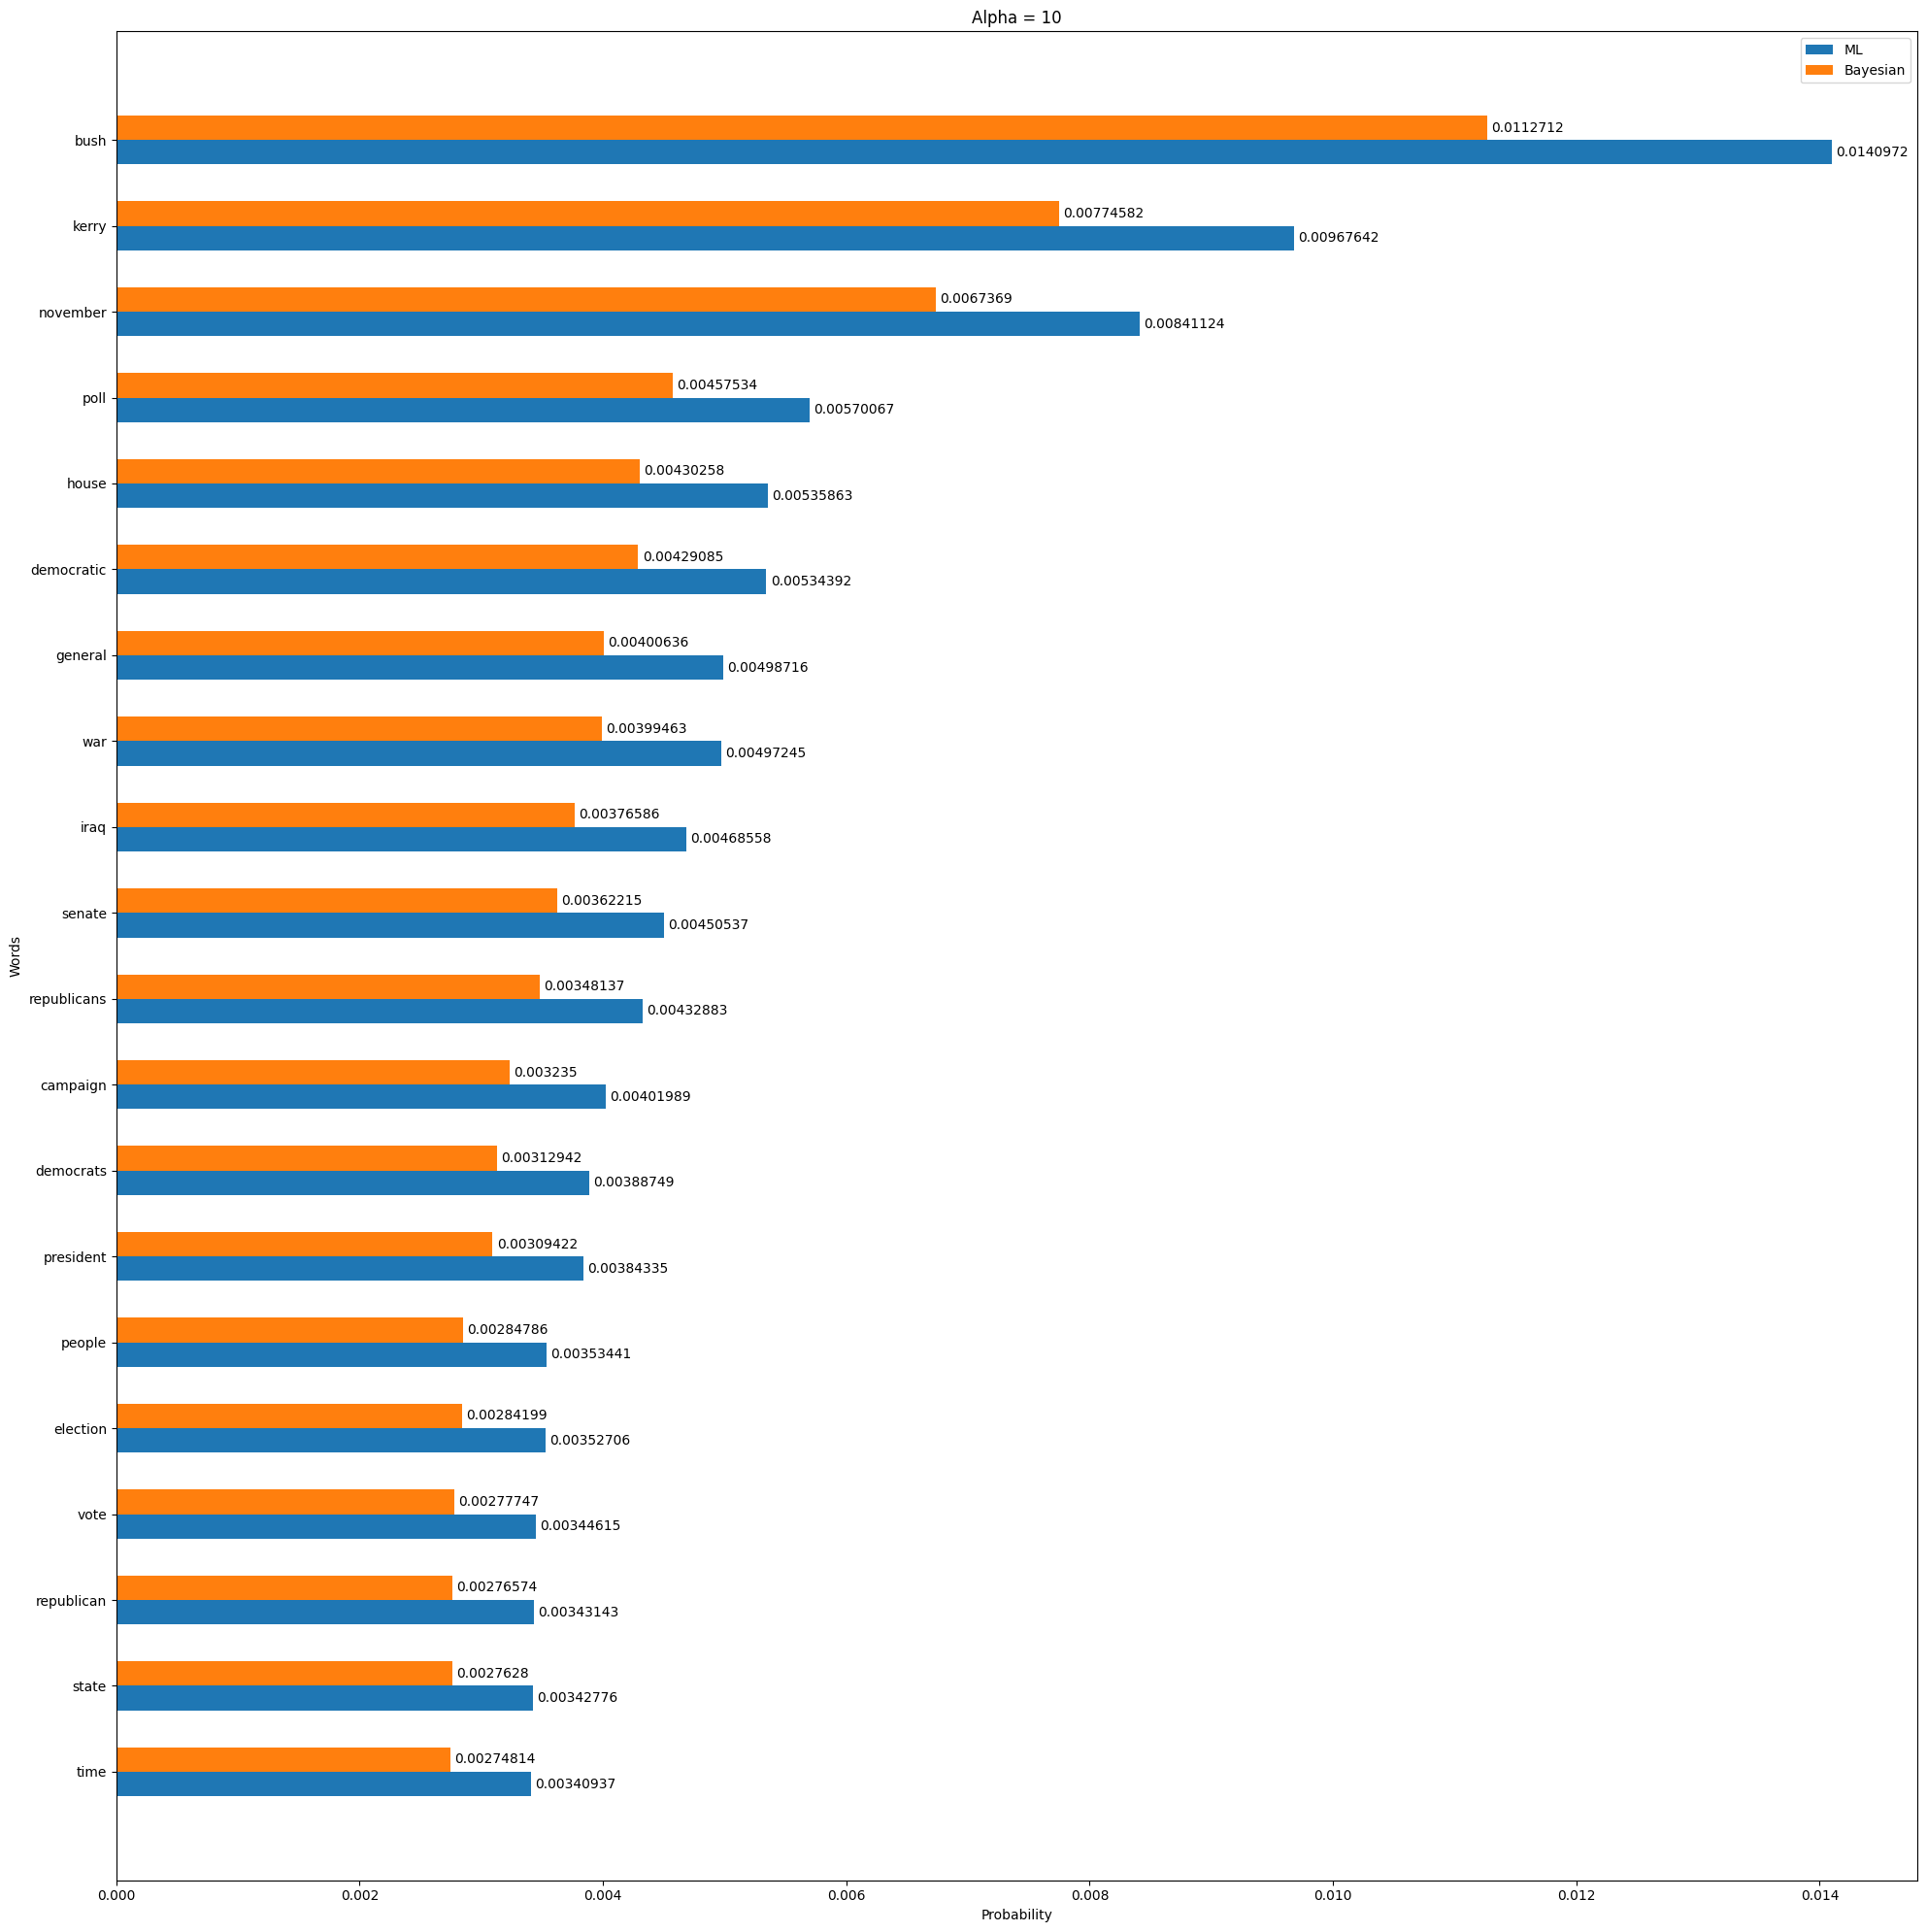

In [65]:
alpha = 10

post_counts = counts + alpha

probs = np.true_divide(post_counts, np.sum(post_counts))

M=20

width=0.3
x = np.linspace(0, M, M)
fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.barh(x - width/2, mlm[sorted_indices[-M:]], width, label='ML')
rects2 = ax.barh(x + width/2, probs[sorted_indices[-M:]], width, label='Bayesian')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Words')
ax.set_xlabel('Probability')
ax.set_yticks(x, labels=sorted_names[-M:])
ax.set_title('Alpha = 10')
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

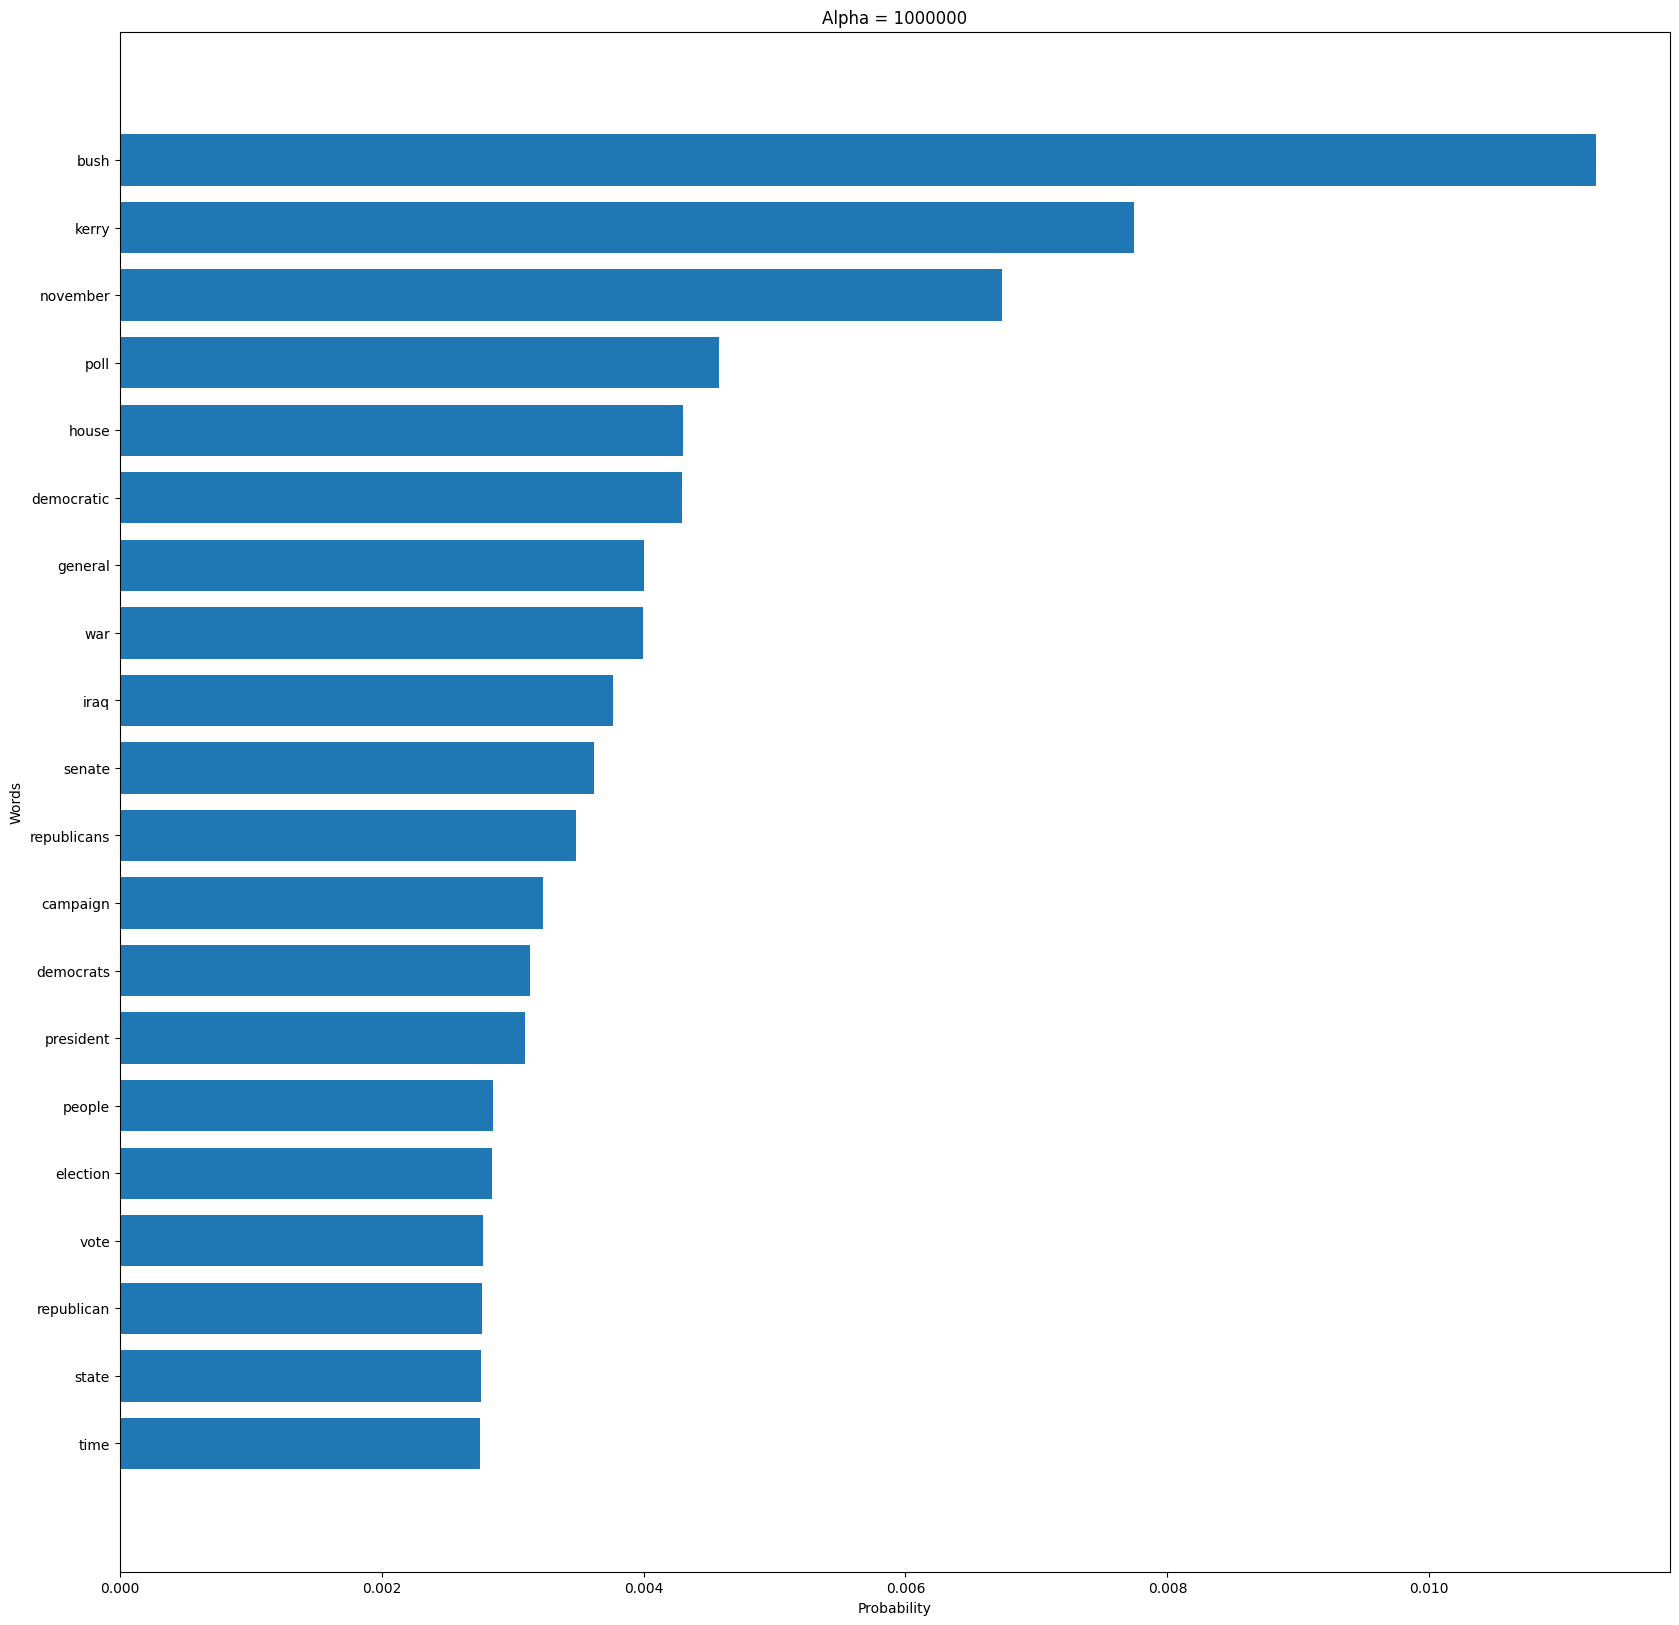

In [66]:
sorted_word(probs, V, M)

# Task C

In [67]:
doc_id = 2001
doc_indices = np.where(B[:, 0] == doc_id)  # get all occurrences of document d in the test data

doc_word_counts = np.zeros(W)

word_ids = np.array(B[doc_indices, 1])  # unique word id's in document d
C_counts = np.array(B[doc_indices, 2])  # counts of words in document d
doc_word_counts[word_ids-1] += C_counts  # marry correct ordering

n = np.sum(doc_word_counts).astype(int)

log_post_freqs = np.log(probs)
log_prob = np.dot(doc_word_counts, log_post_freqs)

perplexity = np.exp(- log_prob / n)

print("Document {} has log probability: l={}".format(doc_id, log_prob))
print("Total n={} words in doc".format(n))
print("Perplexity p={}".format(perplexity))

Document 2001 has log probability: l=-3680.746880187547
Total n=440 words in doc
Perplexity p=4295.545431724654


In [68]:
10**4.5

31622.776601683792

Text(0.5, 0, 'Alpha')

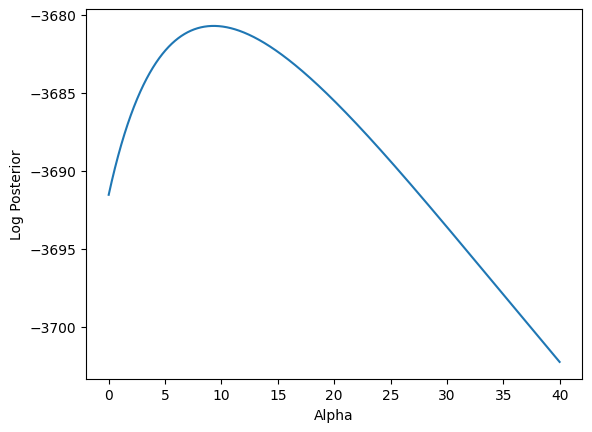

In [77]:
#alphas = np.logspace(-6, 2, 500)
alphas = np.linspace(0.000000001,40,2000)
log_probs = []
for alpha in alphas:
    post_counts = counts + alpha
    probs = np.true_divide(post_counts, np.sum(post_counts))
    
    log_post_freqs = np.log(probs)
    log_probs.append(np.dot(doc_word_counts, log_post_freqs))
log_probs = np.array(log_probs)
perplexities = np.exp(-log_probs/n)
#perplexities.append(np.exp(- log_prob / n))

plt.plot(alphas, log_probs)
plt.ylabel("Log Posterior")
plt.xlabel("Alpha")

In [79]:
x = np.argmin(perplexities)
x

465

In [80]:
min(perplexities), perplexities[x+1]

(4295.246646518836, 4295.246718704036)

In [81]:
alphas[x], alphas[x+1]

(9.304652326930466, 9.324662331932467)

Text(0.5, 0, 'Alpha')

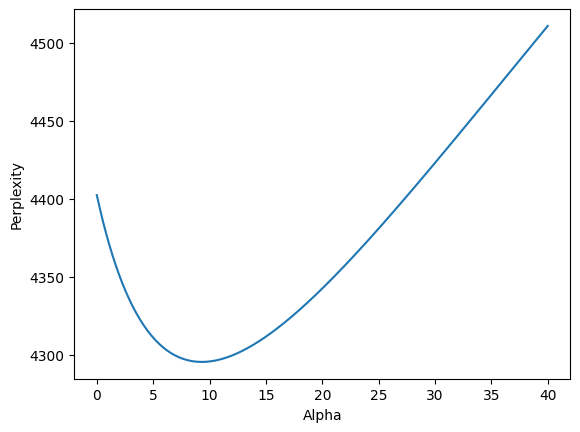

In [82]:
plt.plot(alphas, perplexities)
plt.ylabel("Perplexity")
plt.xlabel("Alpha")

Iterate over all docs

In [91]:
alpha = 1000000
log_probs = []
perplexities = []
doc_ids = np.unique(B[:,0])
for doc_id in doc_ids:
    post_counts = counts + alpha
    probs = np.true_divide(post_counts, np.sum(post_counts))
    
    doc_indices = np.where(B[:, 0] == doc_id)  # get all occurrences of document d in the test data

    doc_word_counts = np.zeros(W)

    word_ids = np.array(B[doc_indices, 1])  # unique word id's in document d
    C_counts = np.array(B[doc_indices, 2])  # counts of words in document d
    doc_word_counts[word_ids-1] += C_counts  # marry correct ordering

    n = np.sum(doc_word_counts).astype(int)
    
    log_post_freqs = np.log(probs)
    log_prob = np.dot(doc_word_counts, log_post_freqs)
    log_probs.append(log_prob)
    perplexities.append(np.exp(-log_prob/n))
log_probs = np.array(log_probs)
perplexities = np.array(perplexities)

Text(0.5, 1.0, 'Alpha = 1000000')

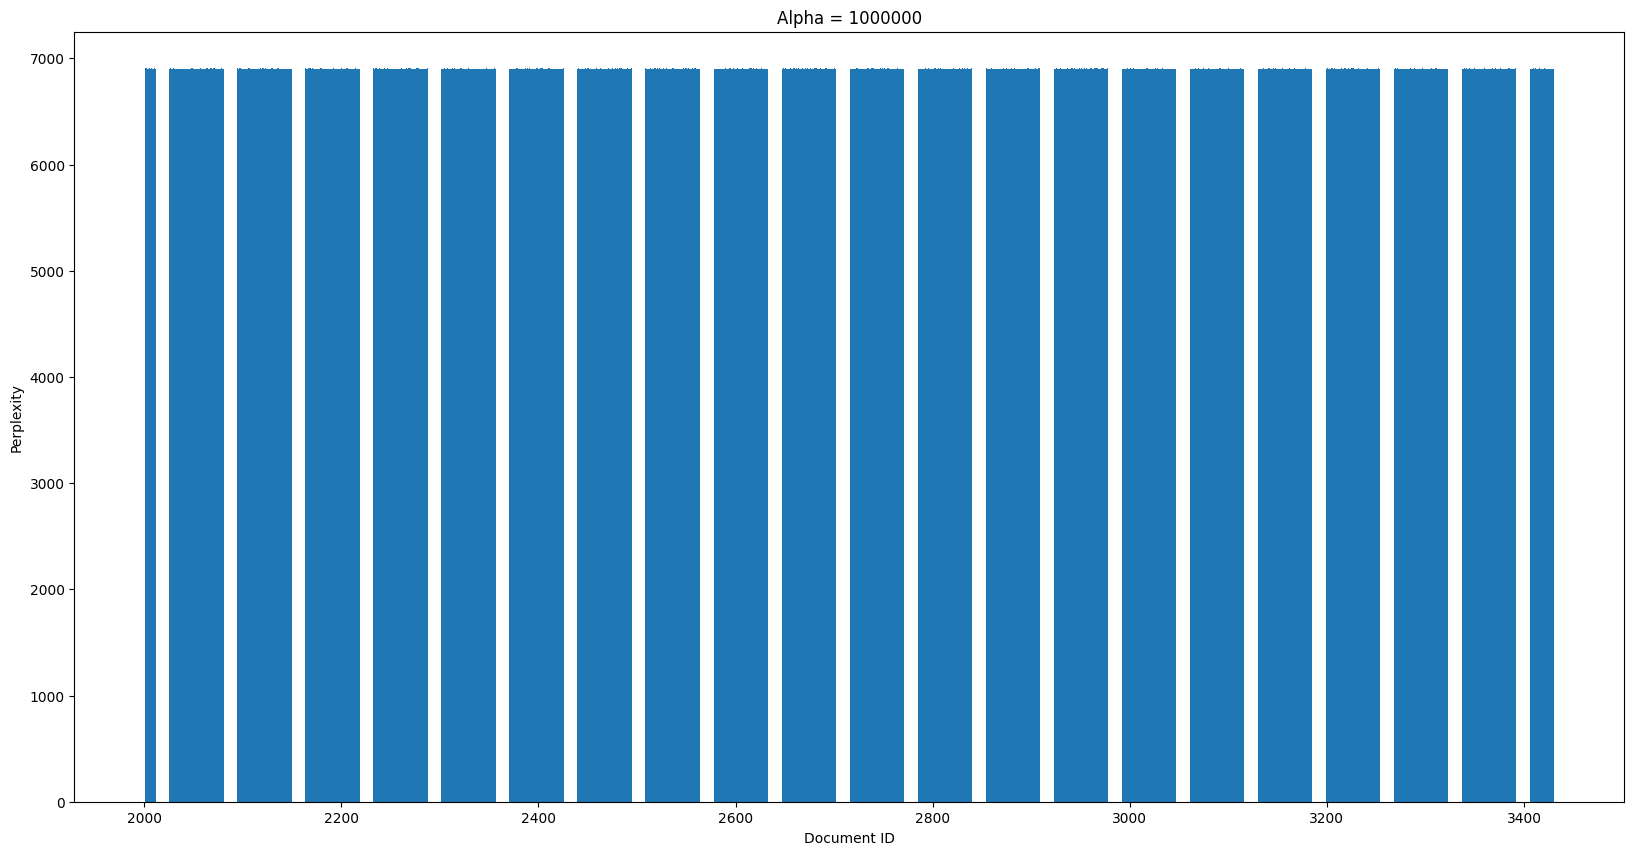

In [92]:
plt.figure(figsize=(20,10))
plt.bar(doc_ids, perplexities)
plt.xlabel('Document ID')
plt.ylabel('Perplexity')
plt.title('Alpha = 1000000')

In [20]:
perplexities[0]

6905.914249097501

# Task D

In [99]:
np.random.seed()
K = 10
alpha = 10  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words
perplexity, swk, mix_prop_evols, diff_mix_prop_evols = BMM(A, B, K, alpha, gamma, num_iters_gibbs=20)

seed=1

[Text(2.761590909090909, 0.012608008658008658, '1'),
 Text(4.475681818181818, 0.2303784632034632, '2'),
 Text(6.189772727272728, 0.027142857142857142, '3'),
 Text(7.903863636363637, 0.018095238095238095, '4'),
 Text(9.617954545454545, 0.24013917748917749, '5'),
 Text(11.332045454545455, 0.029841883116883117, '6'),
 Text(13.046136363636363, 0.02188279220779221, '7'),
 Text(14.760227272727272, 0.09857142857142857, '8'),
 Text(16.474318181818184, 0.14142857142857143, '9'),
 Text(18.18840909090909, 0.12238095238095238, '10')]

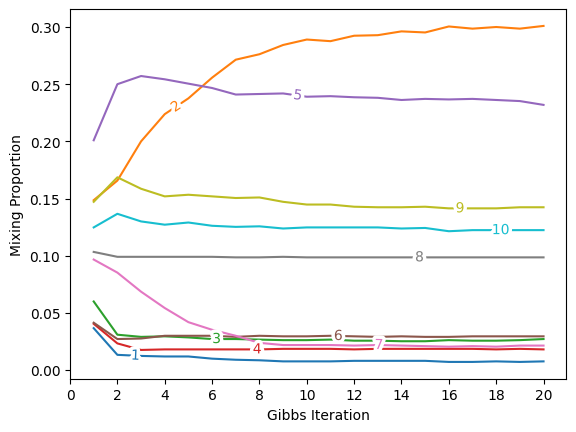

In [100]:
fig, ax = plt.subplots()
num = len(mix_prop_evols[:,0])
for i in range(K):
    ax.plot(np.linspace(1,num,num), mix_prop_evols[:,i], label=str(i+1))
ax.set_xticks(np.linspace(0,num,11))
ax.set_ylabel('Mixing Proportion')
ax.set_xlabel('Gibbs Iteration')
labelLines(ax.get_lines())

[Text(2.761590909090909, 0.026644588744588745, '1'),
 Text(4.475681818181818, 0.018391233766233767, '2'),
 Text(6.189772727272728, 0.3137851731601732, '3'),
 Text(7.903863636363637, 0.1523809523809524, '4'),
 Text(9.617954545454545, 0.006666666666666667, '5'),
 Text(11.332045454545455, 0.008571428571428572, '6'),
 Text(13.046136363636363, 0.35335530303030305, '7'),
 Text(14.760227272727272, 0.09952380952380953, '8'),
 Text(16.474318181818184, 0.014285714285714285, '9'),
 Text(18.18840909090909, 0.009523809523809525, '10')]

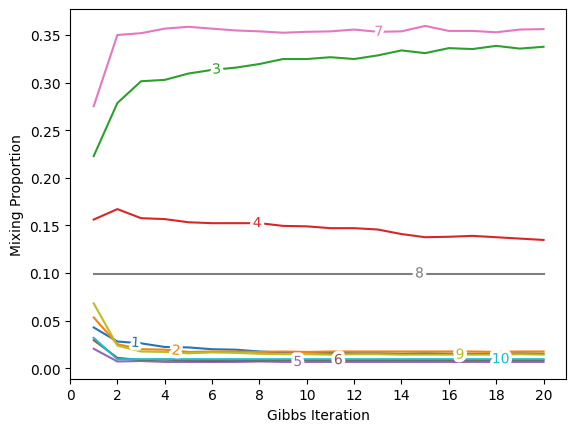

In [98]:
fig, ax = plt.subplots()
num = len(mix_prop_evols[:,0])
for i in range(K):
    ax.plot(np.linspace(1,num,num), mix_prop_evols[:,i], label=str(i+1))
ax.set_xticks(np.linspace(0,num,11))
ax.set_ylabel('Mixing Proportion')
ax.set_xlabel('Gibbs Iteration')
labelLines(ax.get_lines())